# House Price Model: Regression with Regularization

In [1]:
#Standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


In [2]:
# Imports data

house = pd.read_csv('kc_house_data_new.csv', header=0, index_col=1, parse_dates=False)
house.shape

(15386, 25)

In [3]:
house = house.drop(columns='field_1')

In [4]:
house = house.sample(n=50, random_state=1)
house

,date,price,bedrooms,bathrooms,sqft_livin,sqft_lot,floors,waterfront,view,condition,...,yr_renovat,zipcode,lat,long,sqft_liv_1,sqft_lot15,bed_to_bat,has_baseme,water_dist,path_cost
id,,,,,,,,,,,,,,,,,,,,,
1231000310,8/12/2014,713000,1,1.00,1180,4000,1.5,0,2,4,...,0,98118,47.5561,-122.266,1420,4000,1.000000,1,0.240244,0.247597
1332200130,8/22/2014,324950,4,2.50,2641,8615,2.0,0,0,3,...,0,98031,47.4038,-122.213,2641,8091,1.600000,0,6.673592,0.503536
2420069201,11/7/2014,267000,3,2.00,1390,6005,2.0,0,0,3,...,0,98022,47.2117,-121.990,1264,5550,1.500000,0,24.058444,0.503536
9136103027,6/8/2014,445000,2,1.00,1440,3225,1.0,0,0,3,...,0,98103,47.6653,-122.338,1160,3630,2.000000,1,0.486593,0.068770
5379804537,8/26/2014,270000,3,2.25,1760,8287,1.0,0,0,3,...,0,98188,47.4501,-122.274,1290,9587,1.333333,1,4.474060,0.481585
2917200675,1/27/2015,340000,2,1.75,1500,4158,1.0,0,0,4,...,0,98103,47.7006,-122.350,1270,4081,1.142857,1,1.215383,0.148610
8151600470,8/4/2014,121800,2,1.00,940,8384,1.0,0,0,3,...,0,98146,47.5065,-122.364,1290,8384,2.000000,0,0.926689,0.392998
254000695,5/8/2015,410000,3,1.00,1190,5280,1.0,0,0,4,...,0,98146,47.5131,-122.383,1280,5280,3.000000,0,0.543549,0.396878
1829700080,12/12/2014,340000,3,1.00,1450,9586,2.0,0,0,3,...,0,98155,47.7443,-122.326,1500,8592,3.000000,0,1.931416,0.223666


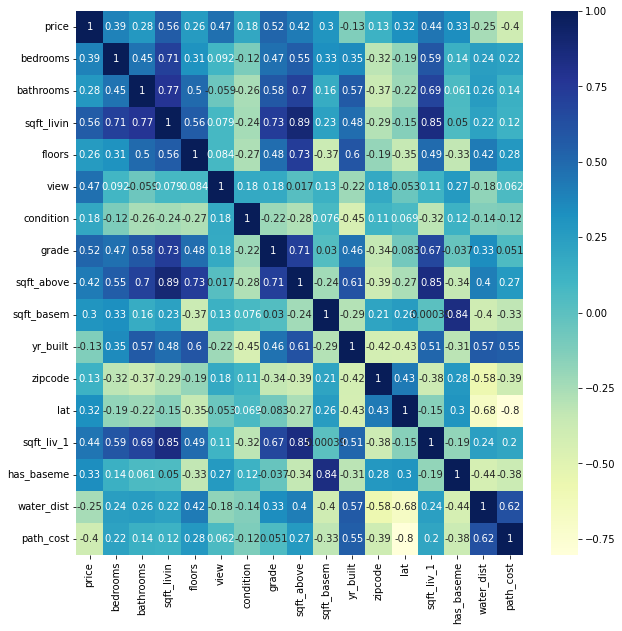

In [5]:
corr = house.iloc[:,1:].corr()
top_corr_features = corr.index[abs(corr["price"])>=0.1]
bottom_corr_features = corr.index[abs(corr["price"])<0.1]

plt.figure(figsize=(10,10))
#plot heat map
#g=sns.heatmap(house.corr(),annot=True,cmap="YlGnBu")
g=sns.heatmap(house[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [6]:
top_corr_features

Index(['price', 'bedrooms', 'bathrooms', 'sqft_livin', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basem', 'yr_built', 'zipcode',
       'lat', 'sqft_liv_1', 'has_baseme', 'water_dist', 'path_cost'],
      dtype='object')

In [7]:
bottom_corr_features

Index(['sqft_lot', 'long', 'sqft_lot15', 'bed_to_bat'], dtype='object')

In [8]:
house = house.drop(columns=bottom_corr_features)
house

,date,price,bedrooms,bathrooms,sqft_livin,floors,waterfront,view,condition,grade,sqft_above,sqft_basem,yr_built,yr_renovat,zipcode,lat,sqft_liv_1,has_baseme,water_dist,path_cost
id,,,,,,,,,,,,,,,,,,,,
1231000310,8/12/2014,713000,1,1.00,1180,1.5,0,2,4,8,840,340,1910,0,98118,47.5561,1420,1,0.240244,0.247597
1332200130,8/22/2014,324950,4,2.50,2641,2.0,0,0,3,7,2641,0,1998,0,98031,47.4038,2641,0,6.673592,0.503536
2420069201,11/7/2014,267000,3,2.00,1390,2.0,0,0,3,8,1390,0,2005,0,98022,47.2117,1264,0,24.058444,0.503536
9136103027,6/8/2014,445000,2,1.00,1440,1.0,0,0,3,7,960,480,1915,0,98103,47.6653,1160,1,0.486593,0.068770
5379804537,8/26/2014,270000,3,2.25,1760,1.0,0,0,3,7,1160,600,1986,0,98188,47.4501,1290,1,4.474060,0.481585
2917200675,1/27/2015,340000,2,1.75,1500,1.0,0,0,4,7,1220,280,1947,0,98103,47.7006,1270,1,1.215383,0.148610
8151600470,8/4/2014,121800,2,1.00,940,1.0,0,0,3,5,940,0,1947,0,98146,47.5065,1290,0,0.926689,0.392998
254000695,5/8/2015,410000,3,1.00,1190,1.0,0,0,4,7,1190,0,1957,0,98146,47.5131,1280,0,0.543549,0.396878
1829700080,12/12/2014,340000,3,1.00,1450,2.0,0,0,3,7,1450,0,1950,0,98155,47.7443,1500,0,1.931416,0.223666


In [9]:
y = house['price']

In [10]:
X = house.drop(columns=['date', 'price', 'waterfront', 'yr_renovat'])
X

,bedrooms,bathrooms,sqft_livin,floors,view,condition,grade,sqft_above,sqft_basem,yr_built,zipcode,lat,sqft_liv_1,has_baseme,water_dist,path_cost
id,,,,,,,,,,,,,,,,
1231000310,1,1.00,1180,1.5,2,4,8,840,340,1910,98118,47.5561,1420,1,0.240244,0.247597
1332200130,4,2.50,2641,2.0,0,3,7,2641,0,1998,98031,47.4038,2641,0,6.673592,0.503536
2420069201,3,2.00,1390,2.0,0,3,8,1390,0,2005,98022,47.2117,1264,0,24.058444,0.503536
9136103027,2,1.00,1440,1.0,0,3,7,960,480,1915,98103,47.6653,1160,1,0.486593,0.068770
5379804537,3,2.25,1760,1.0,0,3,7,1160,600,1986,98188,47.4501,1290,1,4.474060,0.481585
2917200675,2,1.75,1500,1.0,0,4,7,1220,280,1947,98103,47.7006,1270,1,1.215383,0.148610
8151600470,2,1.00,940,1.0,0,3,5,940,0,1947,98146,47.5065,1290,0,0.926689,0.392998
254000695,3,1.00,1190,1.0,0,4,7,1190,0,1957,98146,47.5131,1280,0,0.543549,0.396878
1829700080,3,1.00,1450,2.0,0,3,7,1450,0,1950,98155,47.7443,1500,0,1.931416,0.223666


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r_squared = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('RMSE:', rmse)
    print('R-squared', r_squared)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r_squared = metrics.r2_score(true, predicted)
    return mae, rmse, r_squared

# Linear Regression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)

train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 65553.97222904935
RMSE: 78480.51802612649
R-squared 0.842936896066156
__________________________________
Test set evaluation:
_____________________________________
MAE: 75056.97761397362
RMSE: 112641.95309056836
R-squared 0.5569748715969265
__________________________________


In [14]:
coeff_lin = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Linear: Coef'])
coeff_lin

,Linear: Coef
bedrooms,25472.175378
bathrooms,-52935.732400
sqft_livin,-14.018322
floors,38847.051096
view,63999.184351
condition,107702.657920
grade,42358.034537
sqft_above,81.147043
sqft_basem,-95.165366
yr_built,-544.989261


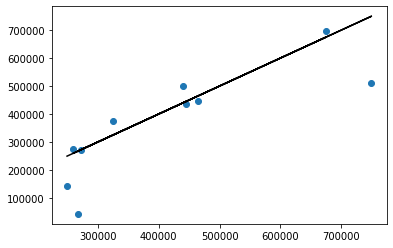

In [15]:
plt.scatter(y_test, pred)
plt.plot(y_test,y_test,'k-') # identity line

In [16]:
results_df_lin = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'RMSE', 'R-squared'])
results_df_lin

,Model,MAE,RMSE,R-squared
0,Linear Regression,75056.977614,112641.953091,0.556975


# Ridge Regression

In [17]:
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 107227.89725546687
RMSE: 136402.5079610234
R-squared 0.5255448501925669
__________________________________
Test set evaluation:
_____________________________________
MAE: 71497.22001733034
RMSE: 85030.66897187739
R-squared 0.747547772091087
__________________________________


In [18]:
coeff_ridge = pd.DataFrame(ridge.coef_, X.columns, columns=['Ridge: Coef'])
pd.concat([coeff_lin, coeff_ridge],axis=1)

,Linear: Coef,Ridge: Coef
bedrooms,25472.175378,340.681124
bathrooms,-52935.732400,-262.548067
sqft_livin,-14.018322,97.213714
floors,38847.051096,305.851864
view,63999.184351,1353.922368
condition,107702.657920,985.373698
grade,42358.034537,1595.646370
sqft_above,81.147043,62.369921
sqft_basem,-95.165366,34.843793
yr_built,-544.989261,-2992.347500


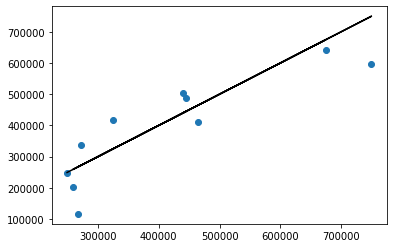

In [19]:
plt.scatter(y_test, pred)
plt.plot(y_test,y_test,'k-') # identity line

In [20]:
results_df_ridge = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'RMSE', 'R-squared'])
results_df_ridge

pd.concat([results_df_lin, results_df_ridge], axis=0, ignore_index=True)

,Model,MAE,RMSE,R-squared
0,Linear Regression,75056.977614,112641.953091,0.556975
1,Ridge Regression,71497.220017,85030.668972,0.747548


# LASSO Regression

In [21]:
lasso = Lasso(alpha=30000)
lasso.fit(X_train, y_train)

train_pred = lasso.predict(X_train)
test_pred = lasso.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 97527.7312986711
RMSE: 128193.66151069549
R-squared 0.580932908227356
__________________________________
Test set evaluation:
_____________________________________
MAE: 68612.79515020624
RMSE: 90832.7346467402
R-squared 0.7119202079600909
__________________________________


In [22]:
coeff_lasso = pd.DataFrame(lasso.coef_, X.columns, columns=['Lasso: Coef'])
pd.concat([coeff_lin, coeff_ridge, coeff_lasso],axis=1)

,Linear: Coef,Ridge: Coef,Lasso: Coef
bedrooms,25472.175378,340.681124,0.000000
bathrooms,-52935.732400,-262.548067,-0.000000
sqft_livin,-14.018322,97.213714,109.356468
floors,38847.051096,305.851864,0.000000
view,63999.184351,1353.922368,6110.038898
condition,107702.657920,985.373698,0.000000
grade,42358.034537,1595.646370,23031.021109
sqft_above,81.147043,62.369921,41.229894
sqft_basem,-95.165366,34.843793,-0.000000
yr_built,-544.989261,-2992.347500,-2795.211072


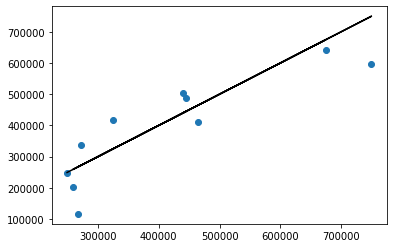

In [23]:
plt.scatter(y_test, pred)
plt.plot(y_test,y_test,'k-') # identity line

In [24]:
results_df_lasso = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'RMSE', 'R-squared'])

pd.concat([results_df_lin, results_df_ridge, results_df_lasso], axis=0, ignore_index=True)

,Model,MAE,RMSE,R-squared
0,Linear Regression,75056.977614,112641.953091,0.556975
1,Ridge Regression,71497.220017,85030.668972,0.747548
2,Lasso Regression,68612.795150,90832.734647,0.711920


# Elastic Net

In [25]:
elastic = ElasticNet(alpha=100, l1_ratio=0.5, max_iter=30000)
elastic.fit(X_train, y_train)

test_pred = elastic.predict(X_test)
train_pred = elastic.predict(X_train)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
_____________________________________
MAE: 108333.68592287655
RMSE: 137713.4632774767
R-squared 0.5163811117833408
__________________________________
Test set evaluation:
_____________________________________
MAE: 71719.74255562722
RMSE: 84100.69722271449
R-squared 0.7530396633396105
__________________________________


In [26]:
coeff_elastic = pd.DataFrame(elastic.coef_, X.columns, columns=['Elastic Net: Coef'])
pd.concat([coeff_lin, coeff_ridge, coeff_lasso, coeff_elastic],axis=1)

,Linear: Coef,Ridge: Coef,Lasso: Coef,Elastic Net: Coef
bedrooms,25472.175378,340.681124,0.000000,156.939956
bathrooms,-52935.732400,-262.548067,-0.000000,-135.211278
sqft_livin,-14.018322,97.213714,109.356468,97.251492
floors,38847.051096,305.851864,0.000000,149.962698
view,63999.184351,1353.922368,6110.038898,696.040455
condition,107702.657920,985.373698,0.000000,503.314607
grade,42358.034537,1595.646370,23031.021109,809.517911
sqft_above,81.147043,62.369921,41.229894,57.310686
sqft_basem,-95.165366,34.843793,-0.000000,38.675567
yr_built,-544.989261,-2992.347500,-2795.211072,-2906.931601


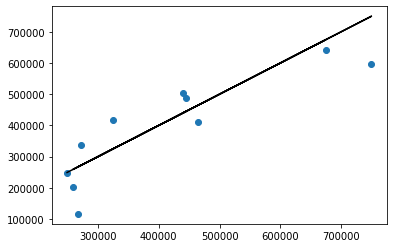

In [27]:
plt.scatter(y_test, pred)
plt.plot(y_test,y_test,'k-') # identity line

In [28]:
results_df_elastic = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'RMSE', 'R-squared'])

pd.concat([results_df_lin, results_df_ridge, results_df_lasso, results_df_elastic], axis=0, ignore_index=True)

,Model,MAE,RMSE,R-squared
0,Linear Regression,75056.977614,112641.953091,0.556975
1,Ridge Regression,71497.220017,85030.668972,0.747548
2,Lasso Regression,68612.795150,90832.734647,0.711920
3,Elastic Net Regression,71719.742556,84100.697223,0.753040
